In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers, layers

### 1. 准备数据

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
print(housing.data[0:5])
print(housing.target[0:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


**数据分割**

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


**归一化**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

### 2. 模型构建

In [6]:
x_train.shape[1:]

(8,)

In [13]:
model = Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])
model.build(input_shape=(None, 8))
model.summary()
model.compile(loss="mean_squared_error", optimizers="sgd")
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2)
]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  900       
_________________________________________________________________
dense_3 (Dense)              multiple                  101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
# model.build?

In [15]:
history = model.fit(x_train_scaled, y_train, 
                    validation_data=(x_valid_scaled, y_valid),
                   epochs=20, callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 114us/sample - loss: 1.1711 - val_loss: 0.6127
Epoch 2/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.6563 - val_loss: 0.4871
Epoch 3/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5533 - val_loss: 0.4379
Epoch 4/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4393 - val_loss: 0.4100
Epoch 5/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4063 - val_loss: 0.3823
Epoch 6/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3649 - val_loss: 0.3695
Epoch 7/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3554 - val_loss: 0.3634
Epoch 8/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3580 - val_loss: 0.3547
Epoch 9/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.3508 - val

In [16]:
# model.fit?

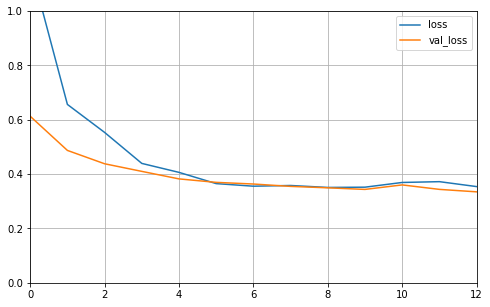

In [17]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [18]:
model.evaluate(x_test_scaled, y_test, verbose=2)

5160/1 - 0s - loss: 0.4949


0.4752031856267027